In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sheryanalysis as sh
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

In [2]:
df = pd.read_csv('data-set.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Dropping the id as it will be of no use
df = df.drop(['customerID'], axis=1)

In [ ]:
df.isnull().sum()
# so there are no null values and the data is perfectly clean

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
sh.analyze(df)
# total charges is string gotta change it to the integers


🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (7043, 20)
🧱 Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

✅ No null values found

🔠 Categorical Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

🔢 Numerical Columns: ['MonthlyCharges']

📝 Text Columns: ['TotalCharges']


{'shape': (7043, 20),
 'columns': ['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'tenure',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'MonthlyCharges',
  'TotalCharges',
  'Churn'],
 'dtypes': {'gender': dtype('O'),
  'SeniorCitizen': dtype('int64'),
  'Partner': dtype('O'),
  'Dependents': dtype('O'),
  'tenure': dtype('int64'),
  'PhoneService': dtype('O'),
  'MultipleLines': dtype('O'),
  'InternetService': dtype('O'),
  'OnlineSecurity': dtype('O'),
  'OnlineBackup': dtype('O'),
  'DeviceProtection': dtype('O'),
  'TechSupport': dtype('O'),
  'StreamingTV': dtype('O'),
  'StreamingMovies': dtype('O'),
  'Contract': dtype('O'),
  'PaperlessBilling': dtype('O'),
  'PaymentMethod': dtype('O'),
  'MonthlyCharges': dtype('float64'),
  'TotalCharges': dtype('O'),
  'Churn': dtype('O')},
 'n

In [21]:
# Changing to numerical and then filling the empty columns
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mode()[0])

In [ ]:
sh.analyze(df)
# so now the data is cleaned and we can move forward to the data visualization


🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (7043, 20)
🧱 Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

✅ No null values found

🔠 Categorical Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

🔢 Numerical Columns: ['MonthlyCharges', 'TotalCharges']


{'shape': (7043, 20),
 'columns': ['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'tenure',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'MonthlyCharges',
  'TotalCharges',
  'Churn'],
 'dtypes': {'gender': dtype('O'),
  'SeniorCitizen': dtype('int64'),
  'Partner': dtype('O'),
  'Dependents': dtype('O'),
  'tenure': dtype('int64'),
  'PhoneService': dtype('O'),
  'MultipleLines': dtype('O'),
  'InternetService': dtype('O'),
  'OnlineSecurity': dtype('O'),
  'OnlineBackup': dtype('O'),
  'DeviceProtection': dtype('O'),
  'TechSupport': dtype('O'),
  'StreamingTV': dtype('O'),
  'StreamingMovies': dtype('O'),
  'Contract': dtype('O'),
  'PaperlessBilling': dtype('O'),
  'PaymentMethod': dtype('O'),
  'MonthlyCharges': dtype('float64'),
  'TotalCharges': dtype('float64'),
  'Churn': dtype('O')

In [24]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Data Visualization

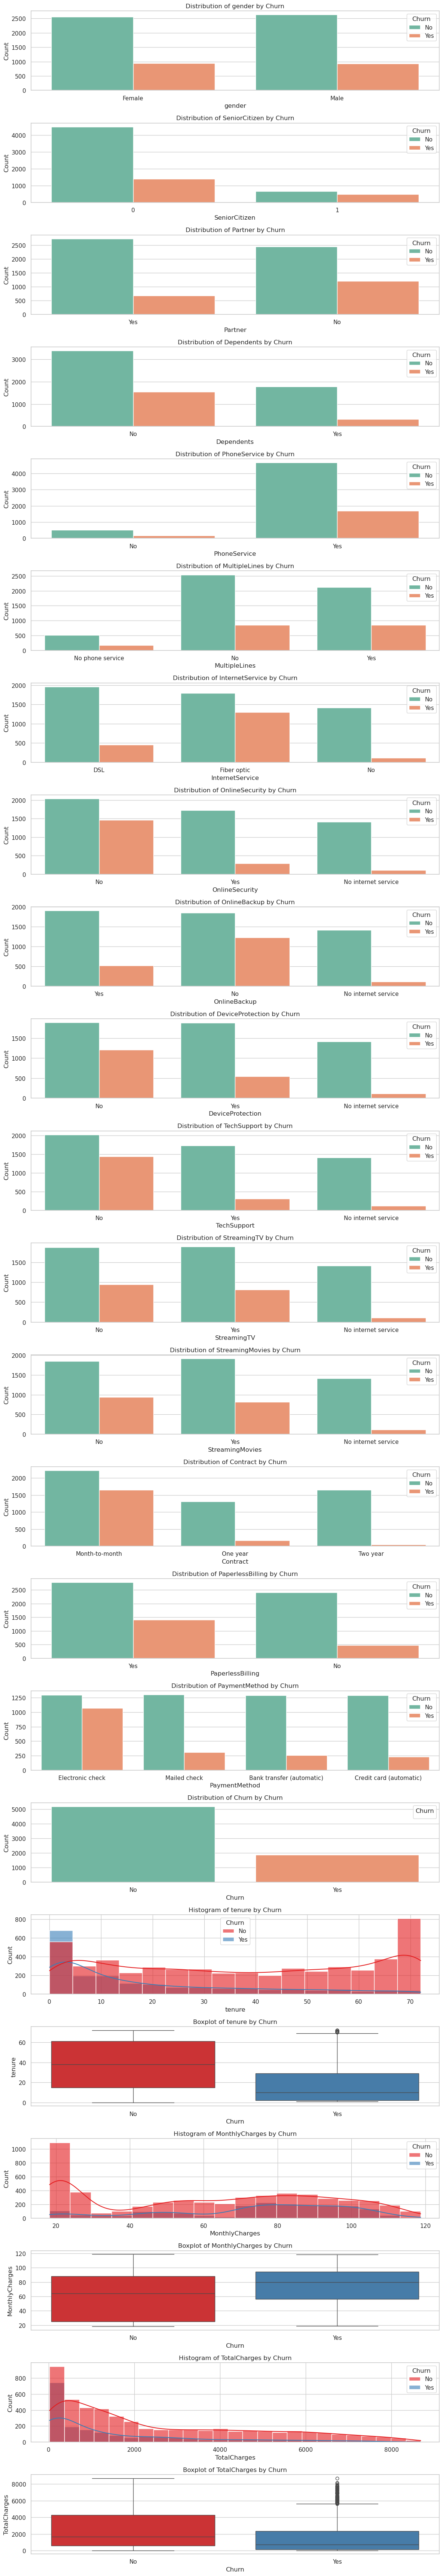

In [ ]:


categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
total_plots = len(categorical_cols) + (2 * len(numerical_cols))
plt.figure(figsize=(12, total_plots * 3))

plot_num = 1

for col in categorical_cols:
    plt.subplot(total_plots, 1, plot_num)
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Churn')
    plot_num += 1

for col in numerical_cols:

    plt.subplot(total_plots, 1, plot_num)
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette='Set1', alpha=0.6)
    plt.title(f'Histogram of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plot_num += 1

    plt.subplot(total_plots, 1, plot_num)
    sns.boxplot(data=df, x='Churn', y=col, palette='Set1')
    plt.title(f'Boxplot of {col} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plot_num += 1

plt.tight_layout()
plt.show()

# gender isnt affecting at all so we can drop  this one
# Senior citizen is good
# Partner is affecting a bit so yeah can use this one too
# Phone service is heavily affecting 
# 